In [1]:
import os
os.getcwd()

'/home/agustin/plant-traits/notebooks'

In [2]:
cd ..

/home/agustin/plant-traits


/home/agustin/.cache/pypoetry/virtualenvs/plant-traits-y5eu6WKG-py3.10/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [3]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler

In [4]:
train_df = pd.read_csv('data/planttraits2024/train.csv')
test_df = pd.read_csv('data/planttraits2024/test.csv')

In [5]:
targets = ["X4_mean", "X11_mean", "X18_mean", "X26_mean", "X50_mean", "X3112_mean"]
sd = ["X4_sd", "X11_sd", "X18_sd", "X26_sd", "X50_sd", "X3112_sd"]

In [6]:
train_df.columns

Index(['id', 'WORLDCLIM_BIO1_annual_mean_temperature',
       'WORLDCLIM_BIO12_annual_precipitation',
       'WORLDCLIM_BIO13.BIO14_delta_precipitation_of_wettest_and_dryest_month',
       'WORLDCLIM_BIO15_precipitation_seasonality',
       'WORLDCLIM_BIO4_temperature_seasonality',
       'WORLDCLIM_BIO7_temperature_annual_range',
       'SOIL_bdod_0.5cm_mean_0.01_deg', 'SOIL_bdod_100.200cm_mean_0.01_deg',
       'SOIL_bdod_15.30cm_mean_0.01_deg',
       ...
       'X18_mean', 'X26_mean', 'X50_mean', 'X3112_mean', 'X4_sd', 'X11_sd',
       'X18_sd', 'X26_sd', 'X50_sd', 'X3112_sd'],
      dtype='object', length=176)

In [7]:
train_df.shape

(55489, 176)

In [8]:
train_df.drop(axis=1, labels=targets+sd).describe()

,id,WORLDCLIM_BIO1_annual_mean_temperature,WORLDCLIM_BIO12_annual_precipitation,WORLDCLIM_BIO13.BIO14_delta_precipitation_of_wettest_and_dryest_month,WORLDCLIM_BIO15_precipitation_seasonality,WORLDCLIM_BIO4_temperature_seasonality,WORLDCLIM_BIO7_temperature_annual_range,SOIL_bdod_0.5cm_mean_0.01_deg,SOIL_bdod_100.200cm_mean_0.01_deg,SOIL_bdod_15.30cm_mean_0.01_deg,...,VOD_X_1997_2018_multiyear_mean_m03,VOD_X_1997_2018_multiyear_mean_m04,VOD_X_1997_2018_multiyear_mean_m05,VOD_X_1997_2018_multiyear_mean_m06,VOD_X_1997_2018_multiyear_mean_m07,VOD_X_1997_2018_multiyear_mean_m08,VOD_X_1997_2018_multiyear_mean_m09,VOD_X_1997_2018_multiyear_mean_m10,VOD_X_1997_2018_multiyear_mean_m11,VOD_X_1997_2018_multiyear_mean_m12
count,5.548900e+04,55489.000000,55489.000000,55489.000000,55489.000000,55489.000000,55489.000000,55489.000000,55489.000000,55489.000000,...,55489.000000,55489.000000,55489.000000,55489.000000,55489.000000,55489.000000,55489.000000,55489.000000,55489.000000,55489.000000
mean,1.714553e+08,14.577142,1058.710939,138.164359,56.727213,518.711405,25.227185,116.895673,140.259205,128.187695,...,0.374976,0.385622,0.391511,0.394641,0.396362,0.393833,0.391273,0.385420,0.378187,0.373244
std,4.087868e+07,7.584290,768.992166,136.409312,31.692061,316.618440,9.151237,17.607857,15.075214,16.030602,...,0.126546,0.130438,0.134787,0.140129,0.139662,0.138971,0.138265,0.134961,0.128688,0.126095
min,2.637500e+04,-13.731130,0.000000,0.000000,0.000000,9.877081,7.658674,29.000000,46.000000,42.000000,...,0.010382,0.008422,0.003341,0.005615,0.005608,0.008641,0.007320,0.007639,0.010804,0.010404
25%,1.658614e+08,9.247916,528.315552,53.000000,29.685472,300.478760,18.800001,106.000000,131.000000,118.000000,...,0.285188,0.292933,0.293150,0.291820,0.294253,0.290927,0.290144,0.287874,0.289432,0.287467
50%,1.915103e+08,15.536692,853.776184,95.500000,50.196312,446.522308,23.681778,118.000000,142.000000,129.000000,...,0.359904,0.372863,0.376943,0.376403,0.377365,0.375070,0.372533,0.368636,0.363573,0.359759
75%,1.951001e+08,20.238457,1352.000000,181.485718,80.811249,690.003845,30.399998,130.000000,150.000000,139.000000,...,0.461714,0.478076,0.488280,0.496335,0.496437,0.490374,0.487336,0.478870,0.465322,0.455181
max,1.967668e+08,30.294445,8392.463867,2448.964355,169.582291,2025.894653,63.657616,194.000000,192.000000,201.000000,...,0.784878,0.803896,0.798269,0.820608,0.869486,0.851053,0.836620,0.832753,0.805387,0.780904


In [9]:
description = train_df.drop(axis=1, labels=targets+sd).apply(zscore).describe(percentiles=[.01, .25, .5, .75, .99]).drop(axis=1, labels=['id'])
description

,WORLDCLIM_BIO1_annual_mean_temperature,WORLDCLIM_BIO12_annual_precipitation,WORLDCLIM_BIO13.BIO14_delta_precipitation_of_wettest_and_dryest_month,WORLDCLIM_BIO15_precipitation_seasonality,WORLDCLIM_BIO4_temperature_seasonality,WORLDCLIM_BIO7_temperature_annual_range,SOIL_bdod_0.5cm_mean_0.01_deg,SOIL_bdod_100.200cm_mean_0.01_deg,SOIL_bdod_15.30cm_mean_0.01_deg,SOIL_bdod_30.60cm_mean_0.01_deg,...,VOD_X_1997_2018_multiyear_mean_m03,VOD_X_1997_2018_multiyear_mean_m04,VOD_X_1997_2018_multiyear_mean_m05,VOD_X_1997_2018_multiyear_mean_m06,VOD_X_1997_2018_multiyear_mean_m07,VOD_X_1997_2018_multiyear_mean_m08,VOD_X_1997_2018_multiyear_mean_m09,VOD_X_1997_2018_multiyear_mean_m10,VOD_X_1997_2018_multiyear_mean_m11,VOD_X_1997_2018_multiyear_mean_m12
count,5.548900e+04,5.548900e+04,5.548900e+04,5.548900e+04,5.548900e+04,5.548900e+04,5.548900e+04,5.548900e+04,5.548900e+04,5.548900e+04,...,5.548900e+04,5.548900e+04,5.548900e+04,5.548900e+04,5.548900e+04,5.548900e+04,5.548900e+04,5.548900e+04,5.548900e+04,5.548900e+04
mean,1.659542e-16,-6.095232e-17,-1.703080e-17,-8.861136e-17,4.161661e-17,-1.289475e-16,2.422727e-16,1.920766e-16,1.618566e-16,1.160143e-16,...,-7.273302e-17,1.622407e-16,-1.883632e-16,-1.667225e-16,3.636651e-17,1.290755e-16,6.837929e-17,1.682591e-16,-1.765825e-16,1.735733e-16
std,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,...,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00
min,-3.732522e+00,-1.376764e+00,-1.012875e+00,-1.789966e+00,-1.607104e+00,-1.919814e+00,-4.991889e+00,-6.252651e+00,-5.376496e+00,-5.772360e+00,...,-2.881158e+00,-2.891829e+00,-2.879910e+00,-2.776226e+00,-2.797874e+00,-2.771760e+00,-2.776965e+00,-2.799203e+00,-2.854848e+00,-2.877533e+00
1%,-2.313099e+00,-1.312545e+00,-9.376210e-01,-1.457318e+00,-1.520722e+00,-1.806808e+00,-2.379395e+00,-2.537911e+00,-2.444577e+00,-2.633245e+00,...,-2.100116e+00,-2.206113e+00,-2.132757e+00,-2.037010e+00,-2.004184e+00,-2.035771e+00,-2.093807e+00,-2.105255e+00,-2.096676e+00,-2.125395e+00
25%,-7.026727e-01,-6.897342e-01,-6.243351e-01,-8.532731e-01,-6.892669e-01,-7.023359e-01,-6.188017e-01,-6.142061e-01,-6.355211e-01,-5.832107e-01,...,-7.095365e-01,-7.106079e-01,-7.297617e-01,-7.337701e-01,-7.311184e-01,-7.404927e-01,-7.314240e-01,-7.227750e-01,-6.896916e-01,-6.802582e-01
50%,1.265192e-01,-2.665002e-01,-3.127700e-01,-2.060756e-01,-2.280023e-01,-1.688757e-01,6.271842e-02,1.154751e-01,5.067261e-02,1.214886e-01,...,-1.191061e-01,-9.782107e-02,-1.080868e-01,-1.301518e-01,-1.360183e-01,-1.350160e-01,-1.355382e-01,-1.243583e-01,-1.135602e-01,-1.069473e-01
75%,7.464595e-01,3.813975e-01,3.175864e-01,7.599459e-01,5.410108e-01,5.652634e-01,7.442385e-01,6.461522e-01,6.744851e-01,6.339972e-01,...,6.854328e-01,7.087965e-01,7.179459e-01,7.257254e-01,7.165615e-01,6.946919e-01,6.947836e-01,6.924276e-01,6.771050e-01,6.498054e-01
99%,1.691435e+00,3.287396e+00,3.274400e+00,2.237373e+00,2.883345e+00,2.868434e+00,1.993692e+00,2.238184e+00,2.171635e+00,2.171523e+00,...,2.355885e+00,2.269686e+00,2.224611e+00,2.208540e+00,2.207530e+00,2.245610e+00,2.270964e+00,2.230789e+00,2.334971e+00,2.424951e+00
max,2.072369e+00,9.536923e+00,1.694035e+01,3.561021e+00,4.760294e+00,4.199517e+00,4.379012e+00,3.432207e+00,4.542123e+00,3.196540e+00,...,3.239195e+00,3.206717e+00,3.017811e+00,3.039851e+00,3.387669e+00,3.290065e+00,3.220998e+00,3.314566e+00,3.319680e+00,3.232976e+00


<Axes: >

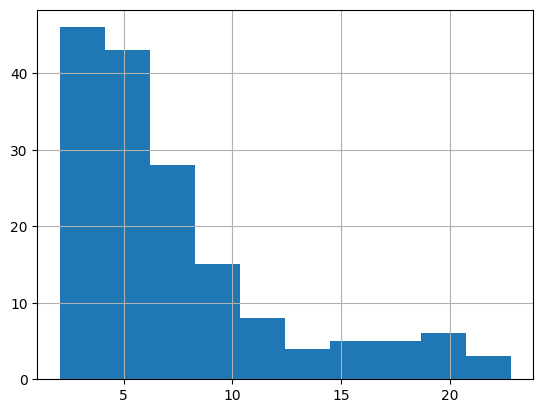

In [10]:
description.loc['max'].hist()

<Axes: >

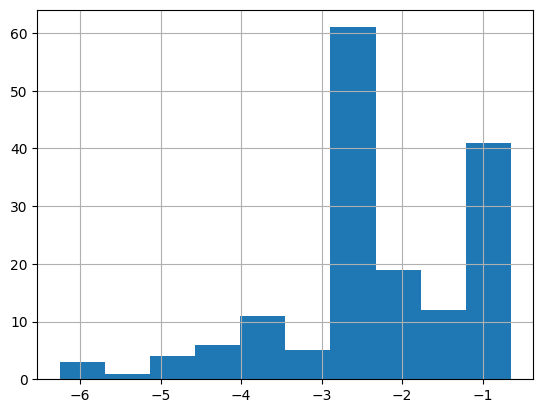

In [11]:
description.loc['min'].hist()

<Axes: >

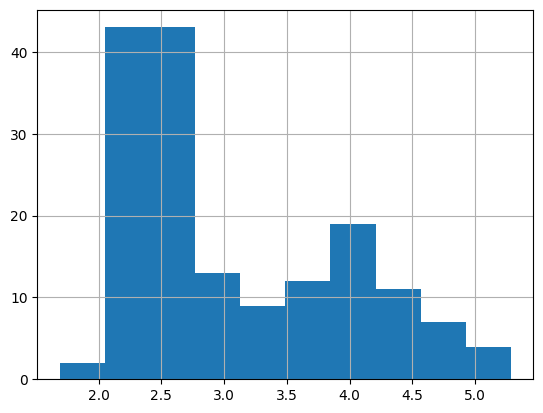

In [12]:
description.loc["99%"].hist()

<Axes: >

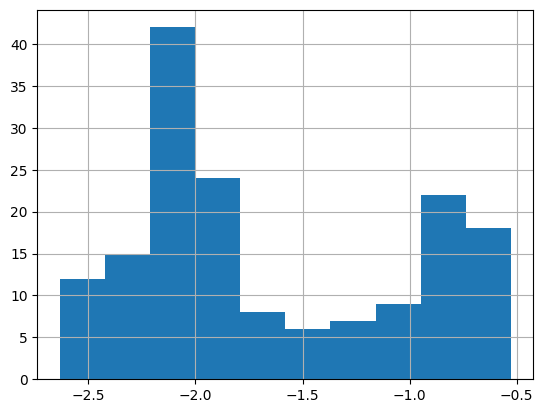

In [13]:
description.loc["1%"].hist()

In [14]:
zcored_data = train_df.apply(zscore).drop(axis=1, labels=targets+sd+['id'])
mask = np.abs(zcored_data) > 3

In [15]:
train_df

,id,WORLDCLIM_BIO1_annual_mean_temperature,WORLDCLIM_BIO12_annual_precipitation,WORLDCLIM_BIO13.BIO14_delta_precipitation_of_wettest_and_dryest_month,WORLDCLIM_BIO15_precipitation_seasonality,WORLDCLIM_BIO4_temperature_seasonality,WORLDCLIM_BIO7_temperature_annual_range,SOIL_bdod_0.5cm_mean_0.01_deg,SOIL_bdod_100.200cm_mean_0.01_deg,SOIL_bdod_15.30cm_mean_0.01_deg,...,X18_mean,X26_mean,X50_mean,X3112_mean,X4_sd,X11_sd,X18_sd,X26_sd,X50_sd,X3112_sd
0,192027691,12.235703,374.466675,62.524445,72.256844,773.592041,33.277779,125,149,136,...,0.117484,1.243779,1.849375,50.216034,0.008921,1.601473,0.025441,0.153608,0.279610,15.045054
1,195542235,17.270555,90.239998,10.351111,38.220940,859.193298,40.009777,124,144,138,...,0.389315,0.642940,1.353468,574.098472,0.003102,0.258078,0.000866,0.034630,0.010165,11.004477
2,196639184,14.254504,902.071411,49.642857,17.873655,387.977753,22.807142,107,133,119,...,8.552908,0.395241,2.343153,1130.096731,NaN,NaN,NaN,NaN,NaN,NaN
3,195728812,18.680834,1473.933350,163.100006,45.009758,381.053986,20.436666,120,131,125,...,1.083629,0.154200,1.155308,1042.686546,0.011692,2.818356,0.110673,0.011334,0.229224,141.857187
4,195251545,0.673204,530.088867,50.857777,38.230709,1323.526855,45.891998,91,146,120,...,0.657585,10.919966,2.246226,2386.467180,0.006157,1.128000,0.026996,0.553815,0.107092,87.146899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55484,190558785,19.472172,244.795914,39.127552,67.074493,472.710358,27.758673,118,140,131,...,0.233690,1.783193,1.608341,969.547831,NaN,NaN,NaN,NaN,NaN,NaN
55485,194523231,13.724150,1450.000000,162.260208,43.139324,652.716858,26.694387,125,144,135,...,1.017099,12.713048,2.418300,1630.015480,0.005474,0.128133,0.117010,3.164520,0.082212,136.503697
55486,195888987,14.741204,581.866638,109.231110,89.272148,507.273010,26.874668,118,155,136,...,2.717395,10.206478,2.722599,602.229880,0.019727,0.215040,0.156309,0.919139,0.079395,26.159626
55487,135487319,16.094763,1180.838135,80.176193,22.909716,342.184021,17.346189,109,130,117,...,4.429659,9.372170,3.251739,244.387170,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
train_df = train_df[~mask.any(axis=1)]
train_df = train_df.reset_index(drop=True)

In [17]:
train_df

,id,WORLDCLIM_BIO1_annual_mean_temperature,WORLDCLIM_BIO12_annual_precipitation,WORLDCLIM_BIO13.BIO14_delta_precipitation_of_wettest_and_dryest_month,WORLDCLIM_BIO15_precipitation_seasonality,WORLDCLIM_BIO4_temperature_seasonality,WORLDCLIM_BIO7_temperature_annual_range,SOIL_bdod_0.5cm_mean_0.01_deg,SOIL_bdod_100.200cm_mean_0.01_deg,SOIL_bdod_15.30cm_mean_0.01_deg,...,X18_mean,X26_mean,X50_mean,X3112_mean,X4_sd,X11_sd,X18_sd,X26_sd,X50_sd,X3112_sd
0,192027691,12.235703,374.466675,62.524445,72.256844,773.592041,33.277779,125,149,136,...,0.117484,1.243779,1.849375,50.216034,0.008921,1.601473,0.025441,0.153608,0.279610,15.045054
1,195542235,17.270555,90.239998,10.351111,38.220940,859.193298,40.009777,124,144,138,...,0.389315,0.642940,1.353468,574.098472,0.003102,0.258078,0.000866,0.034630,0.010165,11.004477
2,195728812,18.680834,1473.933350,163.100006,45.009758,381.053986,20.436666,120,131,125,...,1.083629,0.154200,1.155308,1042.686546,0.011692,2.818356,0.110673,0.011334,0.229224,141.857187
3,195251545,0.673204,530.088867,50.857777,38.230709,1323.526855,45.891998,91,146,120,...,0.657585,10.919966,2.246226,2386.467180,0.006157,1.128000,0.026996,0.553815,0.107092,87.146899
4,195733955,12.062123,1982.033325,320.138092,74.343796,318.258270,17.557619,101,142,120,...,1.092759,50.801968,1.085978,363.364702,0.002750,0.352804,0.041009,7.854885,0.009494,14.671018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43597,194246645,10.237585,746.724487,38.000000,17.433586,499.778442,26.671429,108,136,122,...,0.431378,2.592842,1.913140,279.204596,NaN,NaN,NaN,NaN,NaN,NaN
43598,190558785,19.472172,244.795914,39.127552,67.074493,472.710358,27.758673,118,140,131,...,0.233690,1.783193,1.608341,969.547831,NaN,NaN,NaN,NaN,NaN,NaN
43599,194523231,13.724150,1450.000000,162.260208,43.139324,652.716858,26.694387,125,144,135,...,1.017099,12.713048,2.418300,1630.015480,0.005474,0.128133,0.117010,3.164520,0.082212,136.503697
43600,195888987,14.741204,581.866638,109.231110,89.272148,507.273010,26.874668,118,155,136,...,2.717395,10.206478,2.722599,602.229880,0.019727,0.215040,0.156309,0.919139,0.079395,26.159626


In [18]:
sc = StandardScaler()

train_variables = train_df.drop(axis=1, labels=targets+sd+['id'])
column_variables = train_variables.columns
targets_df = train_df[targets+sd+['id']]

test_variables = test_df.drop(axis=1, labels=['id'])
test_ids = test_df[['id']]

In [22]:
transformed_variables = sc.fit_transform(train_variables.values)

transformed_train_df = pd.DataFrame(transformed_variables, columns = column_variables)

transformed_test = sc.transform(test_variables.values)
transformed_test_df = pd.DataFrame(transformed_test, columns=test_variables.columns)

In [24]:
merged_transformed_train_df = targets_df.merge(transformed_train_df, left_index=True, right_index=True)
merged_transformed_test_df = test_ids.merge(transformed_test_df, left_index=True, right_index=True)

In [28]:
merged_transformed_train_df.to_csv('data/planttraits2024/transformed_train_df.csv')
merged_transformed_test_df.to_csv('data/planttraits2024/transformed_test_df.csv')